In [1]:
#importing the necessary tools 

import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits() #load the dataset

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


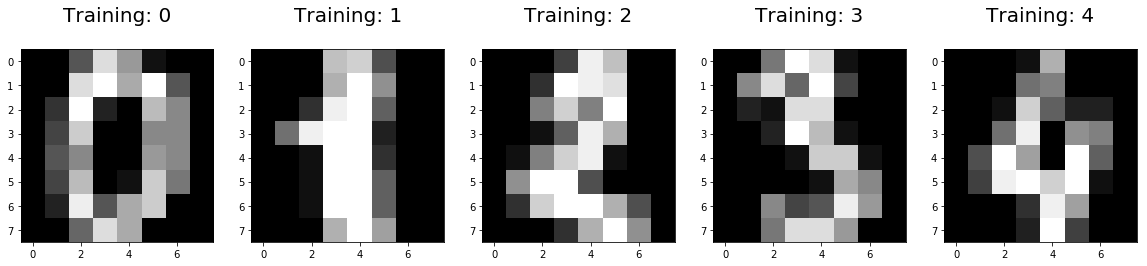

In [3]:
#plot a sample of the dataset(as a picture)
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

## ● Split the data into a training, development and test set

In [4]:
#preparing the data for spliting by assing the 
X = digits.data
y = digits.target


In [5]:
#to divide the dataset into three sample (train,dev,test) we're going to take advantage of the sklearn.model_selection class' train_test_split method

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40,random_state=42 )
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size = 0.50)

In [6]:
#check the portion using our traditional percentage method
X_train.size/X.size,  X_test.size/X.size, X_dev.size/X.size

(0.5998887033945465, 0.2003338898163606, 0.19977740678909292)

In [7]:
y_train

array([7, 6, 0, ..., 2, 7, 1])

## ● We're going to try and experiment with different algorith then we will Choose two among those models.

* To select a 2 pontential models I'm going to test 6 different models and pick two among them

In [9]:
# load the module and necssary tool for testing the performance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.model_selection import cross_val_score
import xgboost
from sklearn import svm, tree
from sklearn import metrics



# create a list and append 6  different models to it

classifiers = []

model1 = xgboost.XGBClassifier(random_state=42)
classifiers.append(model1)
model2 = svm.SVC(gamma='auto',random_state=42)
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier(random_state=42)
classifiers.append(model3)
model4 = RandomForestClassifier(n_estimators=100, random_state=42)
classifiers.append(model4)
model5 = AdaBoostClassifier(n_estimators=50,random_state=42)
classifiers.append(model5)
model6 = GradientBoostingClassifier(n_estimators = 100,random_state=42)
classifiers.append(model6)


#loop through the list get the model fit the training data to it and try it with the development set
for i,clff in enumerate(classifiers):
    
    clff.fit(X_train, y_train)
    
    print("Accuracy",i+1,':',metrics.accuracy_score(y_dev, clff.predict(X_dev)))

Accuracy 1 : 0.9610027855153204
Accuracy 2 : 0.46518105849582175
Accuracy 3 : 0.8328690807799443
Accuracy 4 : 0.9749303621169917
Accuracy 5 : 0.28969359331476324
Accuracy 6 : 0.9693593314763231


## for this task we gonna go with model4 and 6
* and the reason we choose those 2 its prety obvious that they perform very well on the data that they've never seen before

In [10]:

for i in enumerate([model4, model6]):
    clff = i[1]
    #clff.fit(X_train, y_train)
    prediction_ = clff.predict(X_dev)
    print("Accuracy",i[0]+1,':',metrics.accuracy_score(y_dev, prediction_))

Accuracy 1 : 0.9749303621169917
Accuracy 2 : 0.9693593314763231


## PARAMETER

### ● For each model, we going to pick one parameter to tune, and explain why we chose that particular  parameter.
I choose these parameters carefully and because they are relevant to type of mmodel we're gonna be working with
one of them is "n_estimator" ... the in depth post about parameter by: Mathabi ben explains that "n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data." find the link below for more details https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

### ● Choose which value for the parameter to set for testing on the test data and why.

about the values that i have selected to test the models on.. I did a pre-testing (e.i loop i range(1,100)  n_estimator = i ) and from there i picked some values where the model peforms well. but to make a good combition of the best value for each parameter we are going to use GridsearchCV from sklearn module.

In [11]:
# creating a dict with parameter and values
param_grid = { 
    'n_estimators': [ 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,15,20],
    'criterion' :['gini', 'entropy']
}

In [12]:
# importing gridsearch and test different parameter on the train set

from sklearn.model_selection import GridSearchCV



CV_rfc = GridSearchCV(estimator=model4, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_ # this function returns the best combination 

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 300}

In [13]:
param_grid2 = { 
    'n_estimators': [ 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,15,20],
    
}
CV_rfc = GridSearchCV(estimator=model6, param_grid=param_grid2, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}

In [14]:

model4_best = RandomForestClassifier(criterion = 'gini',
                                 max_depth = 15,
                                 max_features = 'log2',
                                 n_estimators = 300,
                                 random_state = 1)
model4_best.fit(X_train, y_train)
pred4_best = model4_best.predict(X_dev)


model6_best = GradientBoostingClassifier(max_depth = 20, max_features = 'log2', n_estimators = 200,random_state=1)
model6_best.fit(X_train, y_train)
pred6_best = model6_best.predict(X_dev)

print(metrics.accuracy_score(y_dev, pred4_best),metrics.accuracy_score(y_dev, pred6_best))

0.9749303621169917 0.9860724233983287


## ● Print confusion matrices for your two competitor models’ predictions on the test set.

[[31  0  0  0  1  0  0  0  0  0]
 [ 0 45  1  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  0  1  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  1 35  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  3  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  1  0 36]] 0.9749303621169917


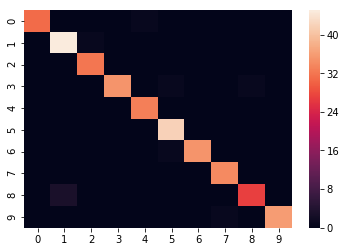

In [15]:
from seaborn import heatmap # we going to use heatmap from seaborn module to get also a picture of our matrices

matrix_ = metrics.confusion_matrix(y_dev, pred4_best)
heatmap(matrix_)
print(matrix_, metrics.accuracy_score(y_dev, pred4_best))

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  1  0  0  0 41  0  0  0  0]
 [ 1  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  1  0 36]] 0.9860724233983287


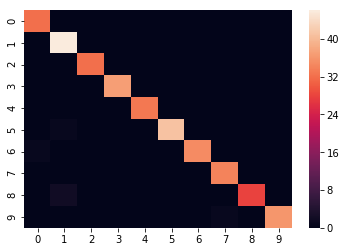

In [16]:


matrix_ = metrics.confusion_matrix(y_dev, pred6_best)
heatmap(matrix_)
print(matrix_, metrics.accuracy_score(y_dev, pred6_best))

## ● Report which classes the models struggle with the most.

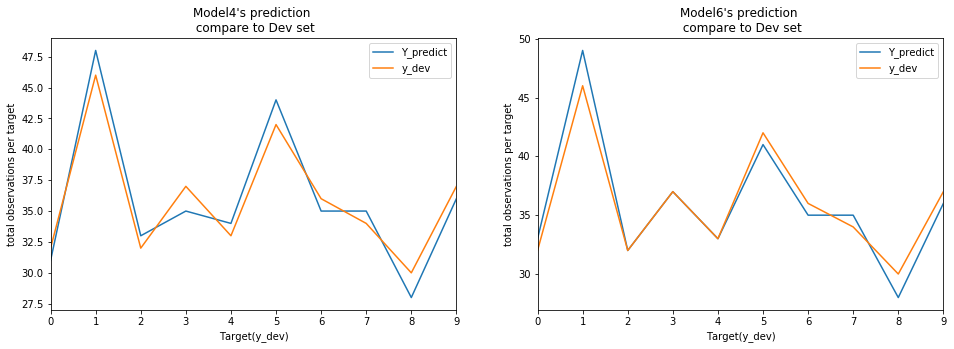

In [17]:
# for our convenience we gonna bring pandas to convert to result to df and manipulate it to so to be 
 
# able to report the classes visually



#we gonna count the total of accurencies of each class in the development set
#and the total of accurencies of each class in the best predicted set

#   then we gonna plot the result to see the distance between the class in the dev set and those predicted

import pandas as pd
plt.figure(figsize=(16,5)) #set a nice and big enough canvas


# what is happening in the loop is i=ax or for graph position, pre=predicted classes for the two models and titl=title of models
for i, pre,  titl in zip(range(2),[pred4_best, pred6_best], ['Model4\'s prediction \n compare to Dev set', 'Model6\'s prediction \n compare to Dev set']):
    
    ax = plt.subplot(1,2,i+1) # set the position of the graph 
    
    #ref line 7-10 
    pd.DataFrame(pre)[0].value_counts().sort_index().plot(ax=ax, label='Y_predict')
    pd.DataFrame(y_dev)[0].value_counts().sort_index().plot(ax=ax,label='y_dev')
    plt.title(titl)
    plt.legend()
    plt.xlabel('Target(y_dev)')
    plt.ylabel('total observations per target')
    
    
   # looking at the graphs below we we see a good harmony and flow between the predicted data and the real data
   
    # but looking closely one can point out that the distance between the data at index 3 is a bit bigger than the other
    #and that both models stuggled a bit to catch the four last points.

## ● Report the accuracy, precision, recall and f1-score.

In [18]:

accu_4 = metrics.accuracy_score(y_dev, pred4_best)
preci_4 = metrics.precision_score(y_dev, pred4_best,average='micro') # will return the total ratio of tp/(tp + fp)
recall_4 = metrics.recall_score(y_dev, pred4_best,average='micro') 
f1_4 = metrics.f1_score(y_dev, pred4_best,average='micro')


print(f"MODEL 4 SCORE REPORTs \n \nAccuracy:{accu_4} \nPrecision:{preci_4} \nRecall:{recall_4} \nF1_score:{f1_4}")

MODEL 4 SCORE REPORTs 
 
Accuracy:0.9749303621169917 
Precision:0.9749303621169917 
Recall:0.9749303621169917 
F1_score:0.9749303621169917


In [19]:

accu_6 = metrics.accuracy_score(y_dev, pred6_best)
preci_6 = metrics.precision_score(y_dev, pred6_best,average='micro')  #will return the total ratio of tp/(tp + fp)
recall_6 = metrics.recall_score(y_dev, pred6_best,average='micro') 
f1_6 = metrics.f1_score(y_dev, pred6_best,average='micro')


print(f"MODEL 6 SCORE REPORTs \n \nAccuracy:{accu_6} \nPrecision:{preci_6} \nRecall:{recall_6} \nF1_score:{f1_6}")

MODEL 6 SCORE REPORTs 
 
Accuracy:0.9860724233983287 
Precision:0.9860724233983287 
Recall:0.9860724233983287 
F1_score:0.9860724233983287


## ● The differences in performance and report which model did the best job.s


Although the final results are in favor on model 6, During traing and learning thes models performances were interchangeable. the change was due to fact that each time i had to test them i gave them new data, (where in each function i will set the " random_state=No " but one thing that did not change is the running time Amazingly module 4 ran 2 times faster than module 6. so having say that I will choose model4 dispite the fact that model6 performed well with dev set

but wait a minute i still have the test set. 




pred4_test = model4_best.predict(X_test)

print(metrics.accuracy_score(y_test, pred4_test))


pred6_test = model6_best.predict(X_test)

metrics.accuracy_score(y_test, pred6_test)

# ?